## TEXT RANK on Clusters 

To get top ranked relevant sentences in the cluster for in-depth cluster analysis.

In [1]:
from sentence_transformers import SentenceTransformer
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [2]:
import pandas as pd

df = pd.read_csv('data/cluster.csv')

In [63]:
import numpy as np
from tqdm import tqdm
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

def getData(cluster):
    all_words = ''.join([word for word in df[df['Label'] == cluster]['Speech']]).replace('\n', '.')
    df_analysis = pd.DataFrame(all_words.split('.'), columns=['Speech'])
    df_analysis = df_analysis.loc[df_analysis['Speech'].str.split(' ').apply(len) > 8]
    df_analysis.reset_index(inplace=True,drop=True)
    return all_words, df_analysis

def textRank(df_analysis):

    bert_embeddings = bmodel.encode(df_analysis['Speech'])
    a = bert_embeddings[0]
    b = bert_embeddings[1]
    cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
    
    M = np.eye(bert_embeddings.shape[0])

    for i,a in tqdm(enumerate(bert_embeddings)):
        for j,b in enumerate(bert_embeddings):
            if i != j:
                M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
                
    similarity_graph = networkx.from_numpy_array(M)
    return similarity_graph


2002it [02:33, 13.08it/s]


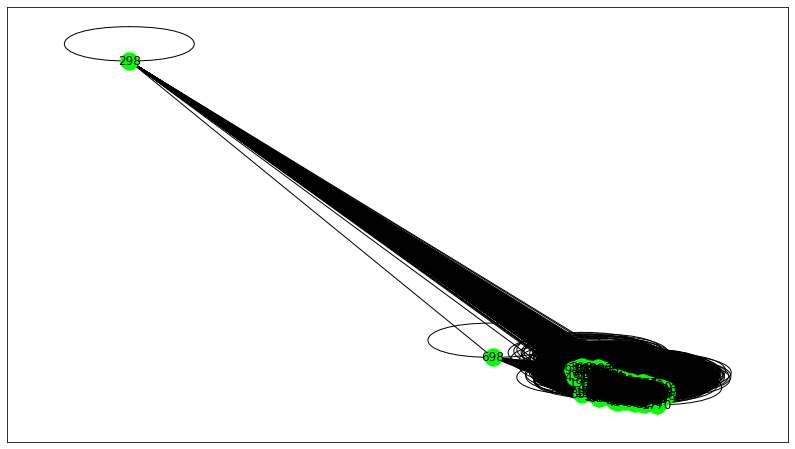

In [50]:
### Text Rank on Cluster 0

allword0, df0 = getData(0)

similarity_graph = textRank(df0)

import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [52]:
scores=networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()),reverse=True)

In [62]:
print('Top ranked/relevant sentences in Cluster 0 are ')
for i in range(0, len(nx_ranked_sentences[:10])):
    print('Sentence ', i)
    print(df0.iloc[nx_ranked_sentences[i][1]]['Speech'])

Top ranked/relevant sentences in Cluster 0 are 
Sentence  0
 the only people she delivers for her donors going deliver for you, the american people lower our taxes, remove destructive regulations, unleash the vast treasure american energy, and negotiate trade deals that put america first, then there limit the number jobs can create and the amount prosperity can unleash first day office going order review every single regulation issued over the last eight years
Sentence  1
 this will include complete revitalization our manufacturing sector, which has been badly hurt hillary clinton policies are bringing the jobs back our country are going renegotiate nafta, keep out the trans-pacific partnership, stand china, and fight for every last american job
Sentence  2
 hillary goal send millions and millions more jobs out our country
Sentence  3
 hillary going raise taxes percent, massively expand regulation, shut down american energy, and push through terrible trade deals that offshore our jobs 

1648it [01:44, 15.76it/s]


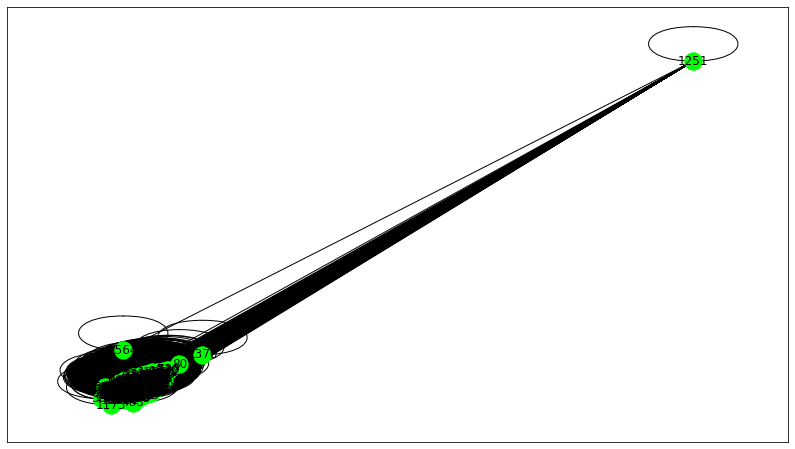

In [64]:
### Text Rank on Cluster 1

allword1, df1 = getData(1)

similarity_graph = textRank(df1)

import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [65]:
scores=networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()),reverse=True)

In [66]:
print('Top ranked/relevant sentences in Cluster 1 are ')
for i in range(0, len(nx_ranked_sentences[:10])):
    print('Sentence ', i)
    print(df1.iloc[nx_ranked_sentences[i][1]]['Speech'])

Top ranked/relevant sentences in Cluster 1 are 
Sentence  0
 and companies were leaving, tremendous unemployment, tremendous problems, making nothing and she said will turn around will create 200,000 jobs going great job
Sentence  1
 and have back congress and have say what happening
Sentence  2
 now, here what going happen not the position one these politicians that running against, you know, the 400 people that inaudible
Sentence  3
 crooked hillary going raise taxes going cut taxes and regulations going reduce the costs education the way going end the common core, and bringing our education local going lift the restrictions american energy and deliver real change for our great american people time
Sentence  4
  listen, you know these politicians, they don know
Sentence  5
 and then came out and said florida and our countries have all these lost jobs
Sentence  6
 and she heard talking very negatively about example, they don talk devaluation, which the single greatest tool that these 